# Performance

Speed of execution and reasonable utilization of computational resources&memory in any types of IT problem solving is crutial and very important part. Perfromance and related topics are called "*non-functional*". Still knowledge of performance topic bescribes true professionalism of a given person.

We will rely on educational material from: https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6 where performace topic is shown based on sophisticated calculation of distance based on GPS-like coordinates.

Two measure a distance between two points on sphere we can use [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula), that determines the great-circle distance between two points on a sphere given their longitudes and latitudes. 

In [ ]:
import numpy as np

# Define a basic Haversine distance formula
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_miles = MILES * c
    km = total_miles*1.609344 #1.609344 miles uz kilometriem
    return km

RIGA:


*   Latitude: 56.9475
*   Longitude: 24.1069

DAUGAVPILS:


*   Latitude: 55.8714
*   Longitude: 26.5161





In [ ]:
haversine(56.9475, 24.1069, 55.8714, 26.5161)

190.47747084369018



---



Q 07.01: Update haversine function so that it woudl return km.

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_miles = MILES * c
    km = total_miles*1.609344 #1.609344 miles uz kilometriem
    return km

In [ ]:
haversine(56.9475, 24.1069, 55.8714, 26.5161)

190.47747084369018



---



**I. Calculate via loop**

Most simple way of calculating new variables (e.g. during feature engineering) is loop through DataFrame and execute mathematical function. Like here:

In [ ]:
def haversine_loop(df, from_lat, from_lng):
  distance_list = []

  for i in range(0, len(df)):
    d = haversine(from_lat, from_lng, df.iloc[i]["lat"], df.iloc[i]["lng"])
    distance_list.append(d)
  
  return distance_list

Let's import out dataset. And run simple analysis to comprehend data.

In [ ]:
import pandas as pd

file_name = "/content/drive/MyDrive/Data analytics course/L_05_worldcities.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import chardet

with open(file_name, "rb") as rawdata:
  result = chardet.detect(rawdata.read())

print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [ ]:
df_cities = pd.read_csv(file_name)
df_cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [ ]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26569 entries, 0 to 26568
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        26569 non-null  object 
 1   city_ascii  26569 non-null  object 
 2   lat         26569 non-null  float64
 3   lng         26569 non-null  float64
 4   country     26569 non-null  object 
 5   iso2        26538 non-null  object 
 6   iso3        26569 non-null  object 
 7   admin_name  26493 non-null  object 
 8   capital     7626 non-null   object 
 9   population  25596 non-null  float64
 10  id          26569 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 2.2+ MB


In [ ]:
df_cities = pd.read_csv(file_name, index_col=10)
df_cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population
id,,,,,,,,,,
1392685764,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0
1360771077,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0
1356872604,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0
1356226629,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0
1608618140,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0


Here are a lot of cities, and countries, but we need Latvian cities only.



---



**Q 07.02:** Create a DataFrame that contains only Latvian cities.

In [ ]:
df_cities_latvija = df_cities.loc[df_cities.country == "Latvia"]
df_cities_latvija.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 1428586192 to 1428894887
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        114 non-null    object 
 1   city_ascii  114 non-null    object 
 2   lat         114 non-null    float64
 3   lng         114 non-null    float64
 4   country     114 non-null    object 
 5   iso2        114 non-null    object 
 6   iso3        114 non-null    object 
 7   admin_name  114 non-null    object 
 8   capital     113 non-null    object 
 9   population  67 non-null     float64
dtypes: float64(3), object(7)
memory usage: 9.8+ KB




---



Nice. Now, let's iterate on haversine distance calculation: from Riga to every other city in Latvia.

In [ ]:
%%timeit
df_cities_latvija["distance"] = haversine_loop(df_cities_latvija, 56.9475, 24.1069)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


10 loops, best of 5: 50.2 ms per loop


**II. Looping with iterrows()**

Because *iterrows* returns a Series for each row, it does not preserve dtypes across the rows (dtypes are preserved across columns for DataFrames).

In [ ]:
%%timeit

haversine_series = []

for index, row in df_cities_latvija.iterrows(): # iteroatora objekts, automātiski pāriet pie nākamā objekta
  haversine_series.append(haversine(56.9475, 24.1069, row['lat'], row['lng']))

df_cities_latvija['distance2'] = haversine_series

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


100 loops, best of 5: 17.8 ms per loop


**III. Iterating with itertuples()**


The [itertuples()](https://www.w3resource.com/pandas/dataframe/dataframe-itertuples.php) function is used to iterate over DataFrame rows as namedtuples.



In [ ]:
%%timeit

haversine_series = []

for row in df_cities_latvija.itertuples():
  haversine_series.append(haversine(56.9475, 24.1069, row.lat, row.lng)) #iterators, bet ar atributiem

df_cities_latvija["distance3"] = haversine_series

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


100 loops, best of 5: 3.64 ms per loop


Ok, we impoved already 10x (from ~35 ms to ~3 ms). Let's proceed with improvements.

**IV. Calculate with apply()**

In [ ]:
%%timeit
df_cities_latvija["distance4"] = df_cities_latvija.apply(lambda row: haversine(56.9475, 24.1069, row['lat'], row['lng']), axis=1) #row ir vnk mainīgā nosaukums

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


100 loops, best of 5: 5.18 ms per loop


In [ ]:
df_cities_latvija

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,distance,distance2,distance3,distance4
id,,,,,,,,,,,,,,
1428586192,Riga,Riga,56.9475,24.1069,Latvia,LV,LVA,Rīga,primary,698529.0,0.000000,0.000000,0.000000,0.000000
1428924928,Daugavpils,Daugavpils,55.8714,26.5161,Latvia,LV,LVA,Daugavpils Novads,admin,84592.0,190.477471,190.477471,190.477471,190.477471
1428511842,Liepāja,Liepaja,56.5083,21.0111,Latvia,LV,LVA,Liepāja,admin,69443.0,195.059212,195.059212,195.059212,195.059212
1428370571,Jelgava,Jelgava,56.6522,23.7244,Latvia,LV,LVA,Jelgavas Novads,admin,55972.0,40.258715,40.258715,40.258715,40.258715
1428952300,Jūrmala,Jurmala,56.9680,23.7704,Latvia,LV,LVA,Jūrmala,admin,48606.0,20.530137,20.530137,20.530137,20.530137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428242925,Nereta,Nereta,56.2044,25.3077,Latvia,LV,LVA,Neretas Novads,admin,NaN,110.624165,110.624165,110.624165,110.624165
1428931914,Cibla,Cibla,56.5498,27.8837,Latvia,LV,LVA,Ciblas Novads,admin,NaN,234.460131,234.460131,234.460131,234.460131
1428746884,Rugāji,Rugaji,57.0033,27.1337,Latvia,LV,LVA,Rugāju Novads,admin,NaN,183.528688,183.528688,183.528688,183.528688


Actually we haven't improved, but slowed bu ~1 ms. However calling *apply()* function is as well right approach. Seems *itertuples()* works better at least in our excercise.

In [ ]:
!pip install line_profiler
%load_ext line_profiler

%lprun -f haversine df_cities_latvija.apply(lambda row: haversine(56.9475, 24.1069, row['lat'], row['lng']), axis=1)

We can see a lot of interesting information from line profiler. Namely:


1.   *haverstine* function is being called 114 time (number of objects to iterate through)
2.   Major amount of time work is done with trigonometrical function

Can we reduce iteration amount, so that significantly save time?



# V. Vectorization

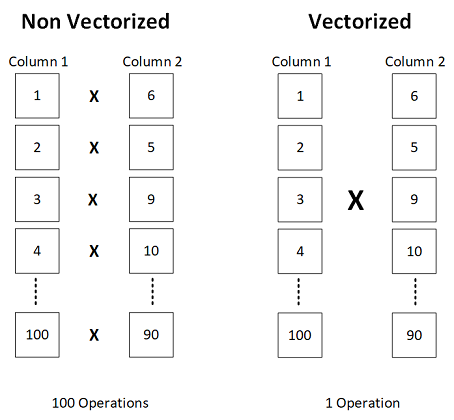

Beacause of design of Pandas - it is capable and intended to work over arrays. In linear algebra we do have vectors (data Series in pandas) - it has its own mathematics for calculation. Do you remeber 1st year calculus studies in University? Matrx operations are executed on all elements simultaniously, not as we did on individual scalars.

In [ ]:
%%timeit

df_cities_latvija['distance5'] = haversine(56.9475, 24.1069, df_cities_latvija['lat'], df_cities_latvija['lng']) #vektorizācija

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


100 loops, best of 5: 3.38 ms per loop


In [ ]:
!pip install line_profiler
%load_ext line_profiler

%lprun -f haversine df_cities_latvija['distance5'] = haversine(56.9475, 24.1069, df_cities_latvija['lat'], df_cities_latvija['lng'])

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now - we see only 1 (!) execution of the calculation logic. Fantastic! Linear algebra works in Pandas. :)

Still - can it be even better? :D

# VI. Vectorization with numpy

The NumPy library, which describes itself as a “fundamental package for scientific computing in Python”, performs operations under the hood in optimized, pre-compiled C code. Like Pandas, NumPy operates on array objects (referred to as ndarrays); however, it leaves out a lot of overhead incurred by operations on Pandas series, such as indexing, data type checking, etc. As a result, operations on NumPy arrays can be significantly faster than operations on Pandas series.

In [ ]:
#vēl ātrāk variants
%%timeit
df_cities_latvija['distance6'] = haversine(56.9475, 24.1069, df_cities_latvija['lat'].values, df_cities_latvija['lng'].values) #padod tikai vērtības


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The slowest run took 9.01 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 279 µs per loop


We convert our latitude and longitude arrays from Pandas series to NumPy arrays simply by using the values method of the series. As with vectorization on the series, passing the NumPy array directly into the function will lead Pandas to apply the function to the entire vector.

Wow! Some micro-seconds! Indeed - overhead of Pandas to proceed indexes, datatypes, conversions and thus sophisticated joins removed by simplifying calculation to just set of scalars.

In [ ]:
!pip install line_profiler
%load_ext line_profiler
%lprun -f haversine df_cities_latvija['distance6'] = haversine(56.9475, 24.1069, df_cities_latvija['lat'].values, df_cities_latvija['lng'].values)


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Still - we have only one run of calculations (Hits == 1) - vectorization still works.

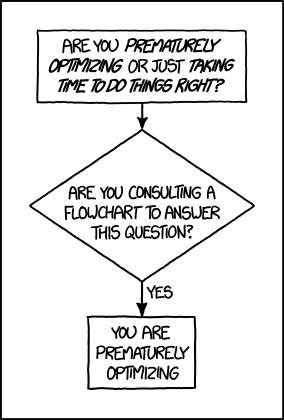